In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [63]:
# Load the datasets
aqua_csv = pd.read_csv('Resources/AQUASTAT Dissemination System.csv')
mie_csv = pd.read_csv('Resources/ua-mie-1.0.csv')
cow_country_codes = pd.read_csv('Resources/COW-country-codes.csv')
micnames = pd.read_csv('Resources/ua-micnames-1.0.csv')
WDI_df = pd.read_csv('Resources/WDI_World.csv')

In [64]:
code_to_country = pd.Series(cow_country_codes.StateNme.values, index=cow_country_codes.CCode).to_dict()

In [65]:
mie_csv['ccode1'] = mie_csv['ccode1'].map(code_to_country)
mie_csv['ccode2'] = mie_csv['ccode2'].map(code_to_country)
mie_csv.head()

,micnum,eventnum,ccode1,ccode2,stmon,stday,styear,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,2,1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,3,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,4,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,4,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,4,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [66]:
mie_csv = mie_csv.rename(columns={'ccode1': 'Country'})
mie_csv = mie_csv.rename(columns={'ccode2': 'Target Country'})
aqua_csv = aqua_csv.rename(columns={'Area': 'Country'})
COW_Country_Codes = cow_country_codes.rename(columns={'StateNme':'Country'})
mie_csv = mie_csv.rename(columns={'styear': 'Year'})

In [67]:
conflict_name = pd.Series(micnames.micname.values, index= micnames.micnum).to_dict()

In [68]:
mie_csv['micnum'] = mie_csv['micnum'].map(conflict_name)
mie_csv.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,Alaska Boundary Dispute (1902),1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,Serbian and Austro-Hungarian Fighting over Alb...,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,British Attempts to Pass the Albanian Corfu Ch...,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,British Attempts to Pass the Albanian Corfu Ch...,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,British Attempts to Pass the Albanian Corfu Ch...,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [69]:
#Filter mie_csv by the years 1980-2015 and count total conflicts per year
filtered_mie_df = mie_csv[(mie_csv['Year'] >= 1980) & (mie_csv['Year'] <= 2015)]
year_counts = filtered_mie_df['Year'].value_counts().sort_index()
mie_per_year_df = pd.DataFrame({'Year': year_counts.index, 'Count': year_counts.values})
mie_per_year_df

,Year,Count
0,1980,223
1,1981,227
2,1982,227
3,1983,203
4,1984,258
5,1985,193
6,1986,180
7,1987,193
8,1988,61
9,1989,59


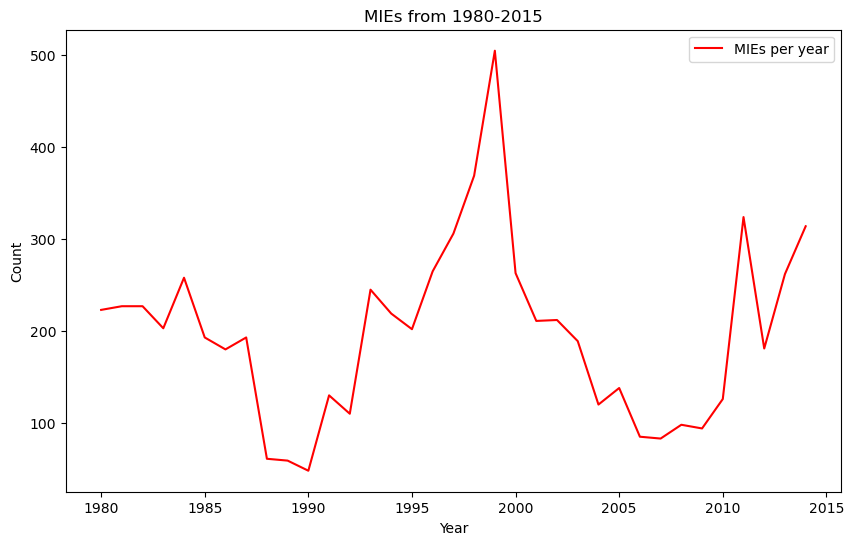

In [70]:
# Plot conflicts between 1980-2015
plt.figure(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='MIEs per year', color="red")
plt.title('MIEs from 1980-2015')
plt.xlabel('Year')
plt.ylabel('Count') 
plt.legend()
plt.show()

In [71]:
#Further filter by country and count total conflict per country between years 1980-2015
filtered_mie_df = mie_csv[(mie_csv['Year'] >= 1980) & (mie_csv['Year'] <= 2015)]
country_counts = filtered_mie_df['Country'].value_counts().sort_index()
mie_per_country_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})
mie_per_country_df

,Country,Count
0,Afghanistan,168
1,Albania,37
2,Algeria,2
3,Angola,20
4,Antigua & Barbuda,1
...,...,...
150,Yemen,6
151,Yemen People's Republic,2
152,Yugoslavia,171
153,Zambia,6


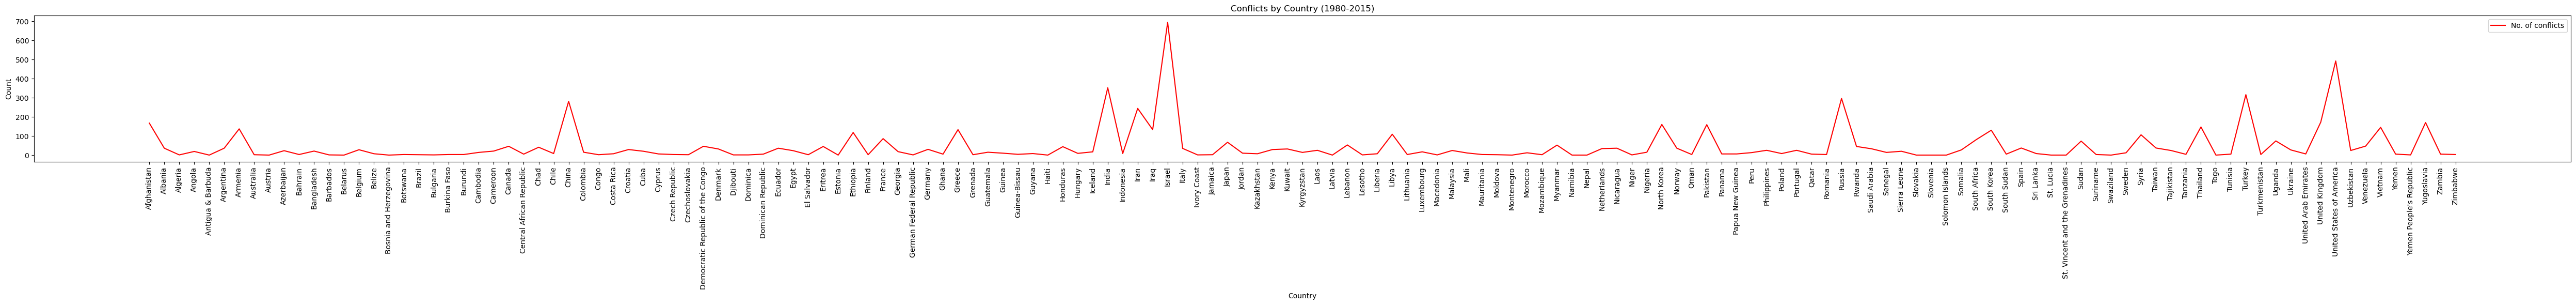

In [72]:
# Plot conflicts by country between 1980-2015
plt.figure(figsize=(50, 6))
sns.lineplot(data=mie_per_country_df, x='Country', y='Count', label='No. of conflicts', color="red")
plt.title('Conflicts by Country (1980-2015)')
plt.xlabel('Country')
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Filter water stress data to include only the specific variable
water_df = pd.DataFrame(aqua_csv)
keyword = 'Water Stress'
filtered_water = aqua_csv['Variable'].str.contains(keyword, na=False)
filtered_water_df = water_df[filtered_water]
filtered_water_df.head()

,VariableGroup,Subgroup,Variable,Country,Year,Value,Unit,Symbol,IsAggregate
27223,Water use,Pressure on water resources,SDG 6.4.2. Agricultural Sector Contribution to...,Australia and New Zealand,2000,4.743018,%,E,True
27224,Water use,Pressure on water resources,SDG 6.4.2. Agricultural Sector Contribution to...,Australia and New Zealand,2001,4.740027,%,E,True
27225,Water use,Pressure on water resources,SDG 6.4.2. Agricultural Sector Contribution to...,Australia and New Zealand,2002,4.580778,%,E,True
27226,Water use,Pressure on water resources,SDG 6.4.2. Agricultural Sector Contribution to...,Australia and New Zealand,2003,4.415610,%,E,True
27227,Water use,Pressure on water resources,SDG 6.4.2. Agricultural Sector Contribution to...,Australia and New Zealand,2004,4.257931,%,E,True


In [101]:
water_year_df = filtered_water_df[(filtered_water_df['Year'] >= 1980) & (filtered_water_df['Year'] <= 2015)]
water_year_counts = water_year_df['Year'].value_counts().sort_index()
water_stress_per_year_df = pd.DataFrame({'Year': water_year_counts.index, 'Count': water_year_counts.values})
water_stress_per_year_df

,Year,Count
0,1981,54
1,1982,55
2,1983,55
3,1984,56
4,1985,61
5,1986,62
6,1987,89
7,1988,90
8,1989,90
9,1990,102


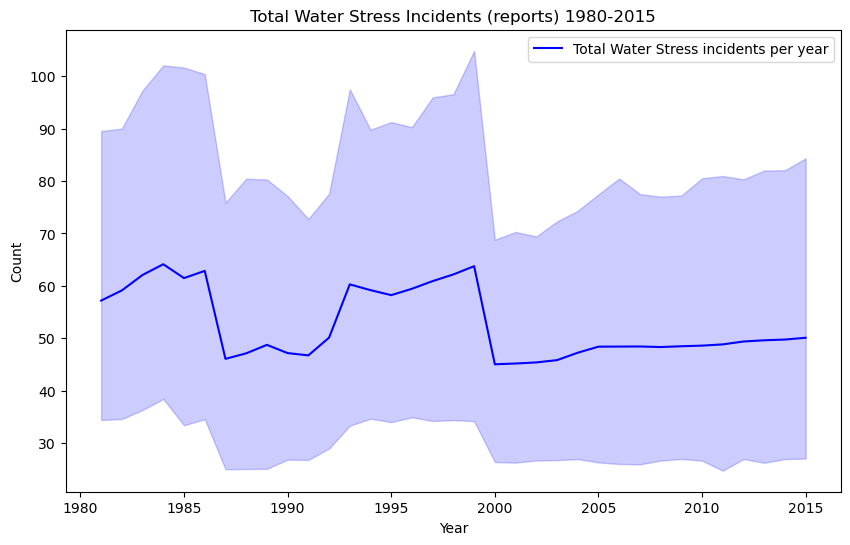

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=water_year_df, x='Year', y='Value', label='Total Water Stress incidents per year', color="blue")
plt.title('Total Water Stress Incidents (reports) 1980-2015')
plt.xlabel('Year')
plt.ylabel('Count') 
plt.legend()
plt.show()

In [89]:
water_stress_per_year_df.head()

,Year,Count
0,1981,54
1,1982,55
2,1983,55
3,1984,56
4,1985,61


In [103]:
#Groupby year and value
total_value_per_year = water_stress_per_year_df.groupby('Year')['Value'].sum().reset_index()
print(total_value_per_year)

KeyError: 'Column not found: Value'

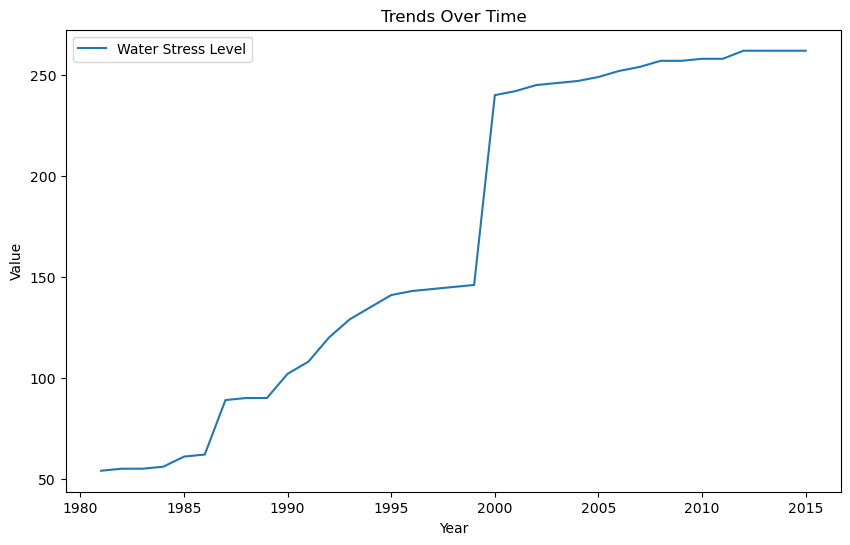

In [92]:
# Total Water Stress Level by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_value_per_year, x='Year', y='Count', label='Water Stress Level')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [93]:
#Further filter water data by country and count total water stress per country between years 1980-2015
water_country_counts = filtered_water_df['Country'].value_counts().sort_index()
water_stress_per_country_df = pd.DataFrame({'Country': water_country_counts.index, 'Count': water_country_counts.values})
water_stress_per_country_df

,Country,Count
0,Afghanistan,41
1,Albania,32
2,Algeria,41
3,Angola,35
4,Antigua and Barbuda,32
...,...,...
194,Western Asia,88
195,World,88
196,Yemen,32
197,Zambia,30


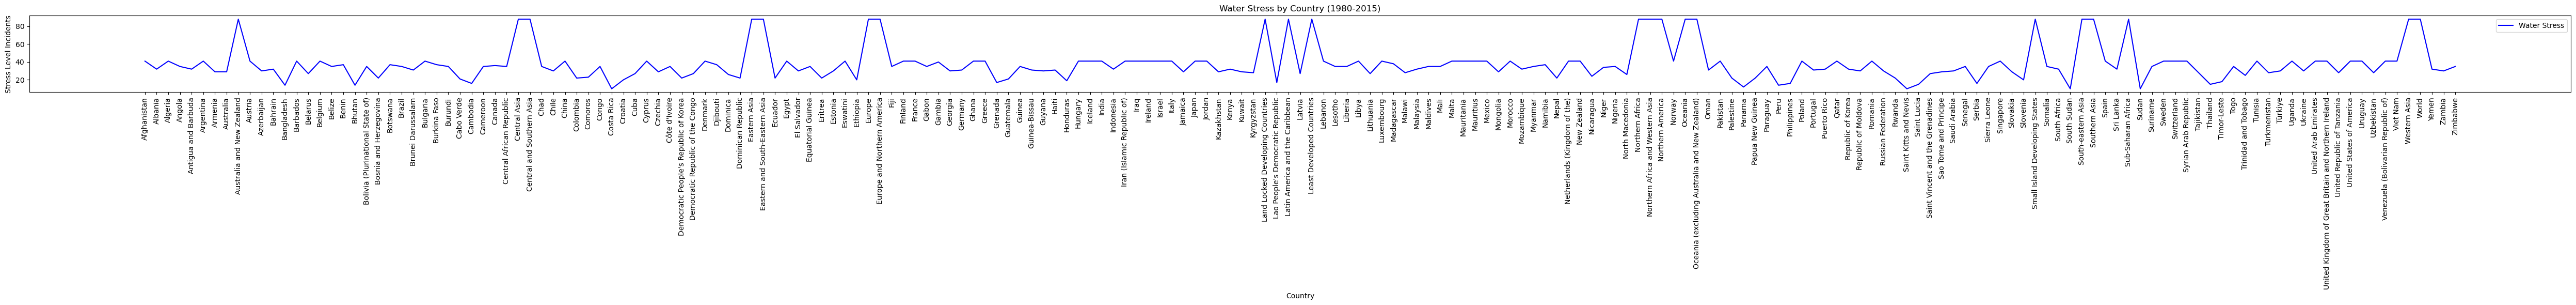

In [94]:
# Plot water stress by country between 1980-2015
plt.figure(figsize=(50, 6))
sns.lineplot(data=water_stress_per_country_df, x='Country', y='Count', label='Water Stress', color="blue")
plt.title('Water Stress by Country (1980-2015)')
plt.xlabel('Country')
plt.ylabel('Stress Level Incidents') 
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

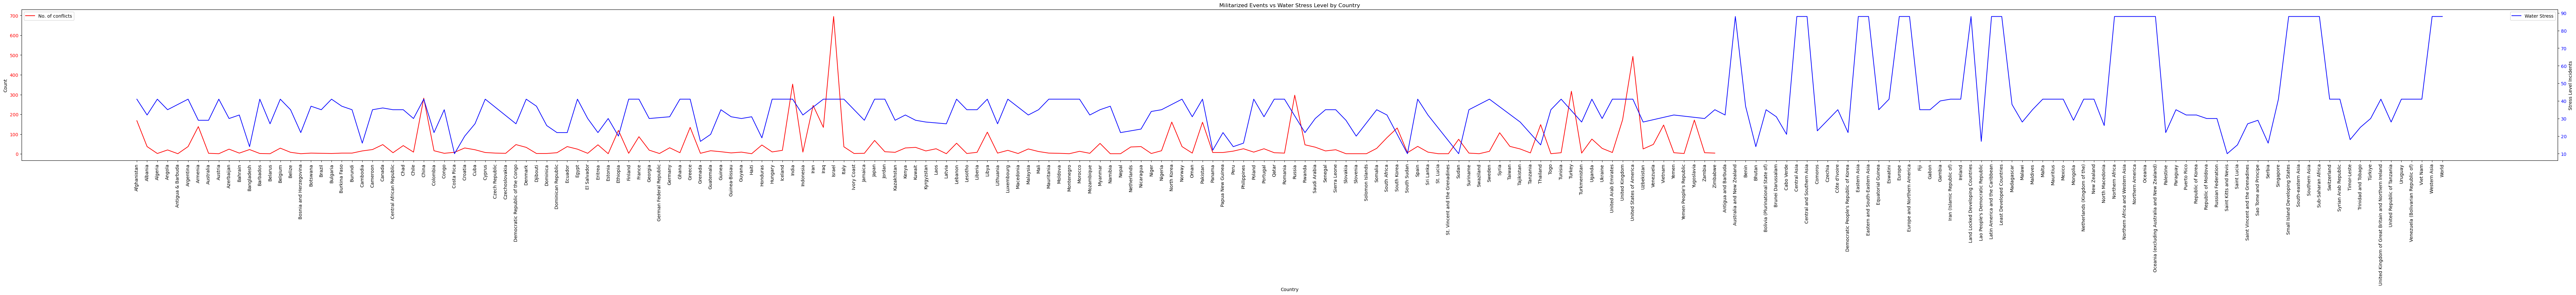

In [95]:
fig, ax1 = plt.subplots(figsize=(100, 6))
sns.lineplot(data=mie_per_country_df, x='Country', y='Count', label='No. of conflicts', color="red")
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=water_stress_per_country_df, x='Country', y='Count', label='Water Stress', color="blue")
plt.xlabel('Country')
ax2.set_ylabel('Stress Level Incidents')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level by Country')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.tick_params(axis='x', labelrotation=90)

plt.savefig('militarized_events_vs_water_stress_by_country.png', bbox_inches='tight') 
plt.show()

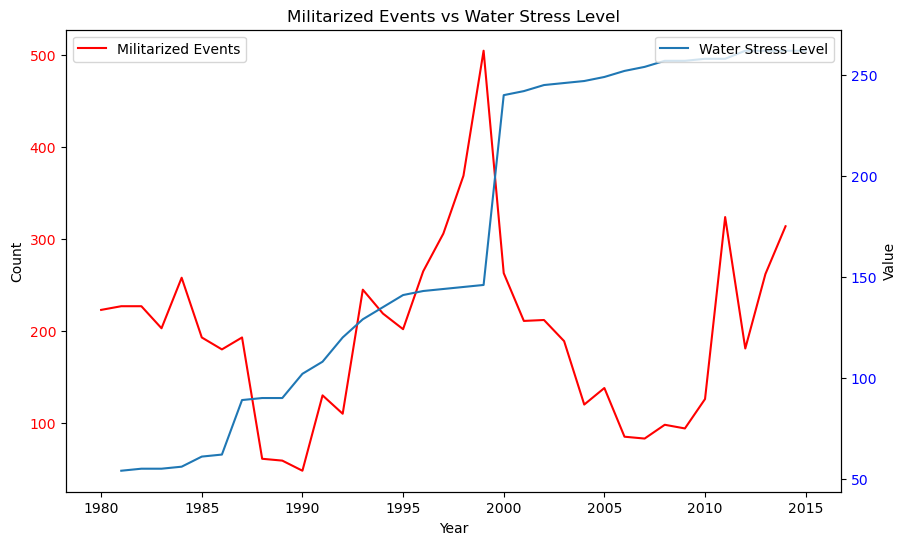

In [98]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=total_value_per_year, x='Year', y='Count', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('militarized_events_vs_water_stress_by_year.png', bbox_inches='tight') 
plt.show()

In [87]:
WDI_df.head()

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,75.6029242323162,75.6959573806835,76.8422110237843,76.5974772799729,76.6024728497366,76.0495676429734,...,51.8801297987834,51.8911235516106,52.966802416295,51.9946192893429,52.0244359748872,51.6598102561403,51.434801818807,51.2004449275282,50.8094847365935,47.1934417463395
1,World,WLD,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,7.0910700563557,7.16024597566327,7.00093699145194,6.87155631154786,6.6958143602211,...,3.17072353955477,3.34625038441823,3.51161492194638,3.62617466845568,3.83079042429474,3.97244074140658,4.00944164694051,4.14482511964403,4.12759739539601,4.21044204006536
2,World,WLD,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,8.99785000063423,9.00101020530396
3,World,WLD,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,..,..,..,..,..,..,...,..,..,..,..,69.7497316936597,..,..,..,..,..
4,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,4.41709984339302,4.52826428575511,4.50380815254763,4.3914854392157,4.60492937876465,4.68950582813015,4.68534777048442,4.71956435074903,4.68223911436346,4.6014345417289


In [88]:
# Set the columns that should stay as identifiers
WDI_indexed_df = WDI_df.set_index(['Country Name', 'Country Code', 'Series Name', 'Series Code'])

# Stack the DataFrame to convert the columns into rows
WDI_stacked_df = WDI_indexed_df.stack().reset_index(name='Value')

# Rename columns
WDI_stacked_df.rename(columns={'level_4': 'Year'}, inplace=True)

# Extract the year from the 'Year' column
WDI_stacked_df['Year'] = WDI_stacked_df['Year'].str.extract(r'(\d{4})').astype(int)

# Display the reshaped DataFrame
WDI_stacked_df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1980,75.6029242323162
1,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1981,75.6959573806835
2,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1982,76.8422110237843
3,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1983,76.5974772799729
4,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1984,76.6024728497366


In [41]:
# Filter to include only the specific variable
keyword = 'NY.GDP.MKTP.CD'
WDI_GDP = WDI_stacked_df['Series Code'].str.contains(keyword, case=False, na=False)
WDI_GDP_df = WDI_stacked_df[WDI_GDP]
WDI_GDP_df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
504,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1980,11419164161217.7
505,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1981,11796482847017.7
506,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1982,11648085880486.3
507,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1983,11972210792643.6
508,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1984,12445989345469.1


In [42]:
WDI_GDP_columns_to_drop = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
WDI_GDP_existing_columns_to_drop = [col for col in WDI_GDP_columns_to_drop if col in WDI_GDP_df.columns]

if WDI_GDP_existing_columns_to_drop:
   WDI_GDP_df = WDI_GDP_df.drop(columns=WDI_GDP_existing_columns_to_drop)
else:
    print("No columns to drop.")

In [46]:
print(WDI_GDP_df.dtypes)

Year      int32
Value    object
dtype: object


In [48]:
WDI_GDP_df['Value'] = WDI_GDP_df['Value'].astype(float)
print(WDI_GDP_df.dtypes)

Year       int32
Value    float64
dtype: object


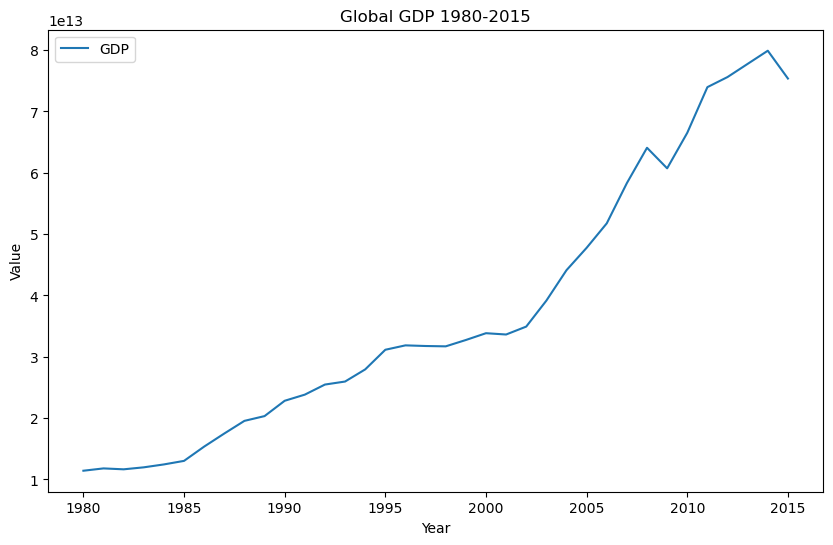

In [49]:
# Global GDP by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=WDI_GDP_df, x='Year', y='Value', label='GDP')
plt.title('Global GDP 1980-2015')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [51]:
# Filter to include only the specific variable
keyword = 'EN.ATM.CO2E.PC'
WDI_CO2 = WDI_stacked_df['Series Code'].str.contains(keyword, case=False, na=False)
WDI_CO2_df = WDI_stacked_df[WDI_CO2]
WDI_CO2_df

,Country Name,Country Code,Series Name,Series Code,Year,Value
144,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1980,..
145,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1981,..
146,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1982,..
147,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1983,..
148,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1984,..
149,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1985,..
150,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1986,..
151,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1987,..
152,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1988,..
153,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1989,..


In [56]:
WDI_CO2_columns_to_drop = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
WDI_CO2_existing_columns_to_drop = [col for col in WDI_CO2_columns_to_drop if col in WDI_CO2_df.columns]

if WDI_CO2_existing_columns_to_drop:
   WDI_CO2_df = WDI_CO2_df.drop(columns=WDI_CO2_existing_columns_to_drop)
else:
    print("No columns to drop.")

In [57]:
print(WDI_CO2_df.dtypes)

Year      int32
Value    object
dtype: object


In [59]:
WDI_CO2_df['Value'] = pd.to_numeric(WDI_CO2_df['Value'], errors='coerce')
print(WDI_CO2_df.dtypes)

Year       int32
Value    float64
dtype: object


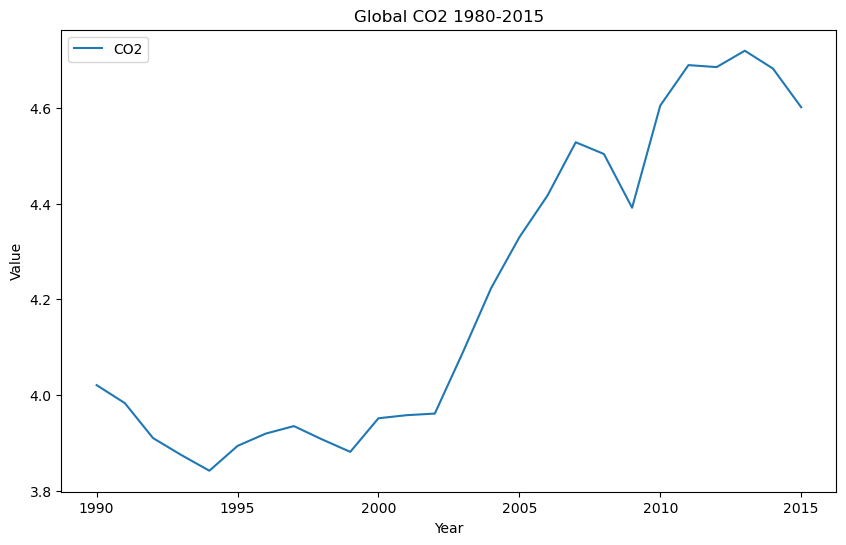

In [60]:
# Global CO2 by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=WDI_CO2_df, x='Year', y='Value', label='CO2')
plt.title('Global CO2 1980-2015')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

NameError: name 'mie_per_year_df' is not defined

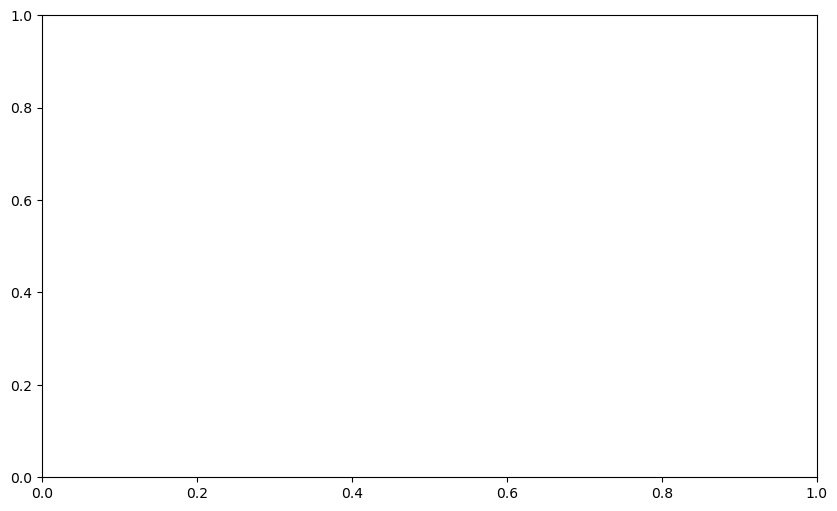

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()

sns.lineplot(ata=WDI_GDP_df, x='Year', y='Value', label='GDP')
plt.xlabel('Year')
ax3.set_ylabel('Value')
ax3.tick_params(axis='y', labelcolor='green')

ax4 = ax1.twinx()

sns.lineplot(data=WDI_CO2_df, x='Year', y='Value', label='CO2')
plt.xlabel('Year')
ax4.set_ylabel('Value')
ax4.tick_params(axis='y', labelcolor='black')

ax1.set_title('Militarized Events, Water Stress Level, GDP, and CO2')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')

plt.savefig('MIEs_vs_water_stress_vs_GDP_vs_CO2_by_year.png', bbox_inches='tight') 
plt.show()

In [126]:
merged_df = pd.merge(mie_csv, aqua_csv, on=['Country', 'Year'])
merged_df.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,...,fatalmin2,fatalmax2,version,VariableGroup,Subgroup,Variable,Value,Unit,Symbol,IsAggregate
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1,-9,1983,1,-9,1983,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3,E,False


In [127]:
merged_df.to_csv('merged_df.csv')

In [128]:
columns_to_drop = ['sidea1', 'action', 'stmon', 'stday', 'endmon', 'endday', 'endyear', 'version', 'VariableGroup', 'Subgroup', 'fatalmin1', 'fatalmin2', 'IsAggregate', 'Symbol']
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]

if existing_columns_to_drop:
   merged_df = merged_df.drop(columns=existing_columns_to_drop)
else:
    print("No columns to drop.")

In [129]:
merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1983,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3


In [130]:
print(merged_df)

                                                  micnum  eventnum   Country  \
0      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
1      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
2      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
3      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
4      Thai-Cambodian-Vietnamese Border Conflict and ...        64  Thailand   
...                                                  ...       ...       ...   
21683                Preah Vihear Temple Conflict (2011)        22  Thailand   
21684                Preah Vihear Temple Conflict (2011)        22  Thailand   
21685                Preah Vihear Temple Conflict (2011)        22  Thailand   
21686                Preah Vihear Temple Conflict (2011)        22  Thailand   
21687                Preah Vihear Temple Conflict (2011)        22  Thailand   

      Target Country  Year  hostlev  fa

In [131]:
# Filter water stress data to include only the specific variable
keyword = 'Water Stress'
filtered_merged_df = merged_df[merged_df['Variable'].str.contains(keyword, na=False)]
filtered_merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
79,The War over Angola of 1975–1976,132,Angola,South Africa,1987,4,0,0,SDG 6.4.2. Water Stress,1.27321,%
82,NaN,47,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%
83,NaN,48,Afghanistan,Pakistan,1981,4,0,0,SDG 6.4.2. Water Stress,49.69101,%
84,NaN,49,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%
85,NaN,50,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%


In [132]:
# temp_df = filtered_merged_df.groupby('Value').apply(lambda x: x.sort_values('Year'))
# temp_df["Value"].sum()
# filtered_merged_df = pd.DataFrame(data)
total_value_per_year = filtered_merged_df.groupby('Year')['Value'].sum().reset_index()
print(total_value_per_year)

    Year         Value
0   1981  20280.552706
1   1982   4732.241872
2   1983   8243.634390
3   1984   8564.155847
4   1985   7020.791950
5   1986  11173.041084
6   1987   4310.766901
7   1988    481.619125
8   1989   1496.425424
9   1990   2895.032961
10  1991   4492.495518
11  1992   2828.150032
12  1993  13384.567186
13  1994  19068.054335
14  1995  12851.227518
15  1996  20966.246113
16  1997  26504.261005
17  1998  12561.895868
18  1999  17599.943313
19  2000   6852.621465
20  2001  10923.654496
21  2002  11332.151429
22  2003  15493.251151
23  2004   4964.032688
24  2005   7439.843981
25  2006   3839.077778
26  2007   3385.996667
27  2008   3700.277712
28  2009   3915.569801
29  2010   5121.473139
30  2011  19261.236364
31  2012   8434.125253
32  2013  12230.464669
33  2014  10810.588177


In [133]:
conflicts_per_year_df = pd.DataFrame(filtered_merged_df["Year"].value_counts())
conflicts_per_year_df

,count
Year,
1999,356
2011,244
1997,215
1998,209
2014,203
1996,184
2013,180
2002,157
2001,148


In [134]:
# Encode 'Country' to numeric values (I didn't want to mess with your code above, Jason, to go back to COW codes)
filtered_merged_df.loc[:, 'Country_encoded'] = pd.factorize(filtered_merged_df['Country'])[0]
print(filtered_merged_df)

                                    micnum  eventnum      Country  \
79        The War over Angola of 1975–1976       132       Angola   
82                                     NaN        47  Afghanistan   
83                                     NaN        48  Afghanistan   
84                                     NaN        49  Afghanistan   
85                                     NaN        50  Afghanistan   
...                                    ...       ...          ...   
21663  Preah Vihear Temple Conflict (2011)        18     Thailand   
21669  Preah Vihear Temple Conflict (2011)        19     Cambodia   
21675  Preah Vihear Temple Conflict (2011)        20     Cambodia   
21681  Preah Vihear Temple Conflict (2011)        21     Thailand   
21687  Preah Vihear Temple Conflict (2011)        22     Thailand   

      Target Country  Year  hostlev  fatalmax1  fatalmax2  \
79      South Africa  1987        4          0          0   
82          Pakistan  1981        3          0   

C:\Users\matth\AppData\Local\Temp\ipykernel_7624\2309374192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df.loc[:, 'Country_encoded'] = pd.factorize(filtered_merged_df['Country'])[0]


In [135]:
# Calculate correlation between encoded 'Country' and 'Value'
correlation = filtered_merged_df[['Country_encoded', 'Value']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 Country_encoded     Value
Country_encoded         1.000000 -0.014013
Value                  -0.014013  1.000000


In [136]:
# Specific correlation value
correlation_value = correlation.loc['Country_encoded', 'Value']
print(f"Correlation between 'Country_encoded' and 'Value': {correlation_value}")

Correlation between 'Country_encoded' and 'Value': -0.014012962261841103


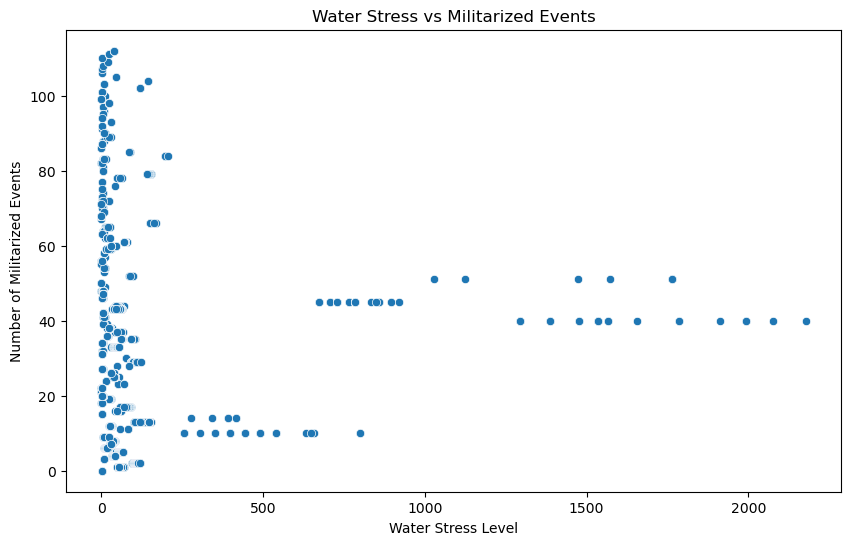

In [137]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_merged_df, x='Value', y='Country_encoded')
plt.title('Water Stress vs Militarized Events')
plt.xlabel('Water Stress Level')
plt.ylabel('Number of Militarized Events')
plt.show()

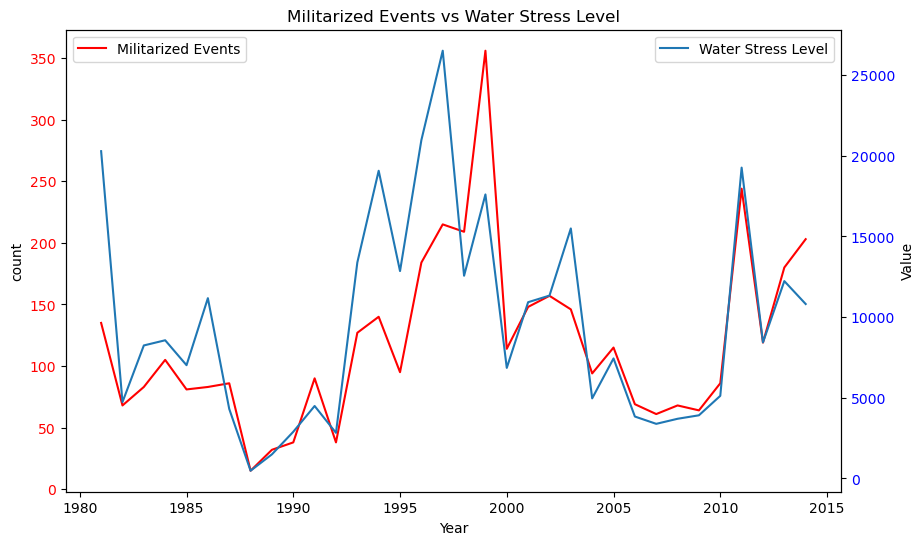

In [138]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=conflicts_per_year_df, x='Year', y='count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

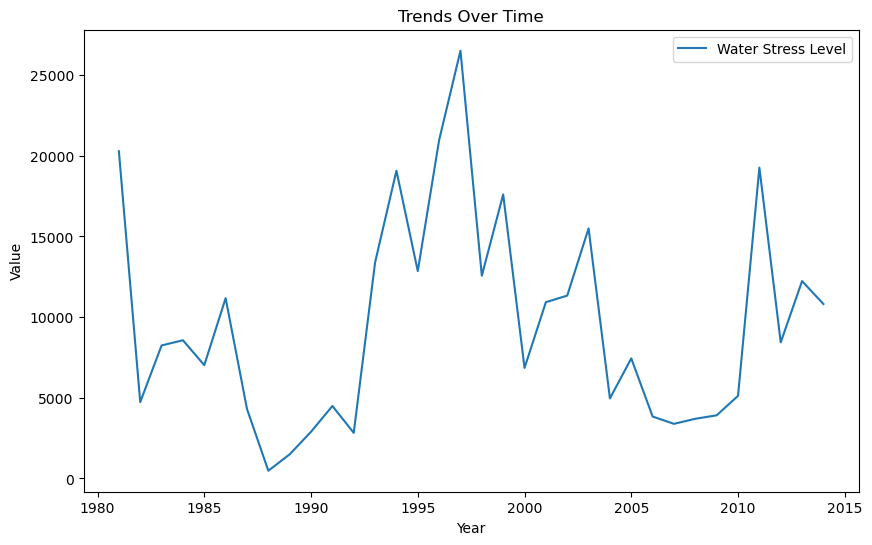

In [139]:
# Additional visualizations (e.g., trend over time)
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [140]:
all_variables_df = merged_df
all_variables_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1983,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3


In [141]:
# Encode 'Country' to numeric values
merged_df.loc[:, 'Country_encoded'] = pd.factorize(merged_df['Country'])[0]
print(merged_df)

                                                  micnum  eventnum   Country  \
0      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
1      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
2      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
3      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
4      Thai-Cambodian-Vietnamese Border Conflict and ...        64  Thailand   
...                                                  ...       ...       ...   
21683                Preah Vihear Temple Conflict (2011)        22  Thailand   
21684                Preah Vihear Temple Conflict (2011)        22  Thailand   
21685                Preah Vihear Temple Conflict (2011)        22  Thailand   
21686                Preah Vihear Temple Conflict (2011)        22  Thailand   
21687                Preah Vihear Temple Conflict (2011)        22  Thailand   

      Target Country  Year  hostlev  fa

In [142]:
# Calculate correlation between encoded 'Country' and 'Value'
correlation = merged_df[['Country_encoded', 'Value']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 Country_encoded     Value
Country_encoded         1.000000  0.004196
Value                   0.004196  1.000000


In [143]:
# Specific correlation value
correlation_value = correlation.loc['Country_encoded', 'Value']
print(f"Correlation between 'Country_encoded' and 'Value': {correlation_value}")

Correlation between 'Country_encoded' and 'Value': 0.00419600785800224


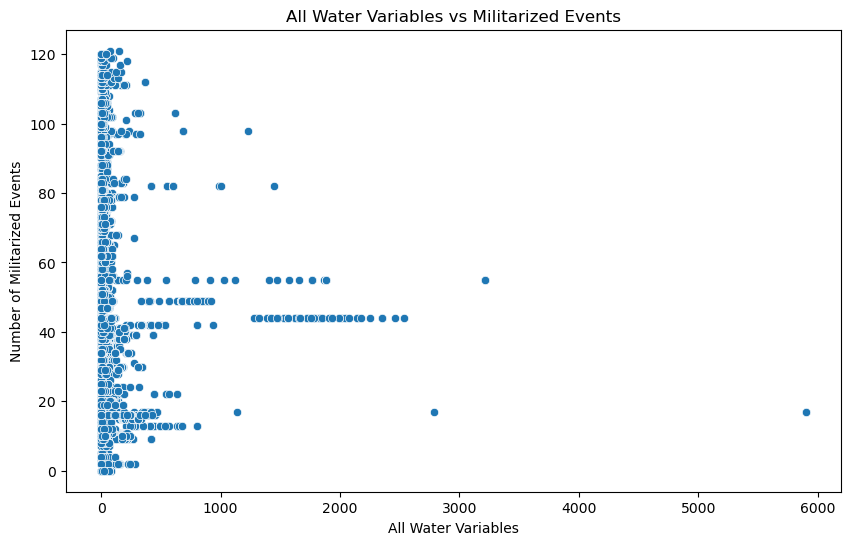

In [144]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Value', y='Country_encoded')
plt.title('All Water Variables vs Militarized Events')
plt.xlabel('All Water Variables')
plt.ylabel('Number of Militarized Events')
plt.show()

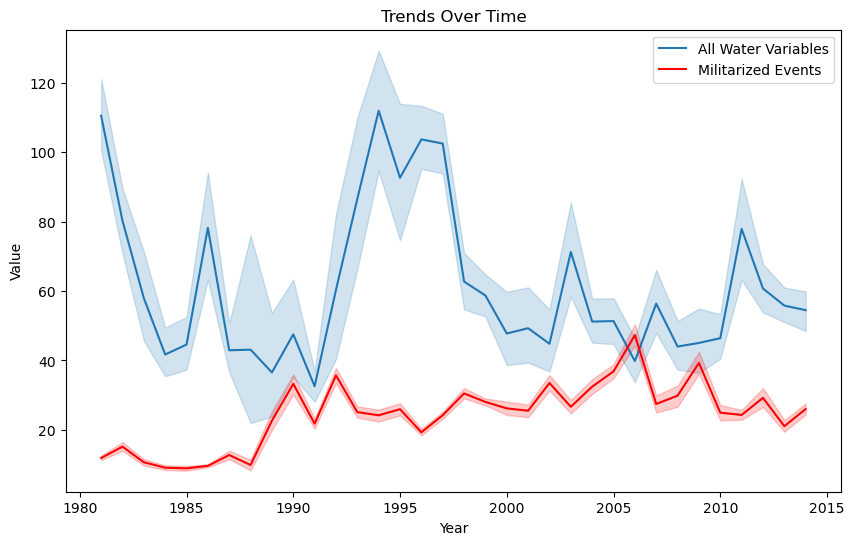

In [145]:
# Additional visualizations (e.g., trend over time)
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Value', label='All Water Variables')
sns.lineplot(data=merged_df, x='Year', y='Country_encoded', label='Militarized Events', color='red')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()